# Detekcja krawędzi

### Mirosław Kuźniar, nr indeksu: 248870

In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from scipy import ndimage

In [3]:
fname = 'head_scan.jpg'
image_grayscale = Image.open(fname).convert("L")
img_gray = np.asarray(image_grayscale)

## Krzyż Robertsa

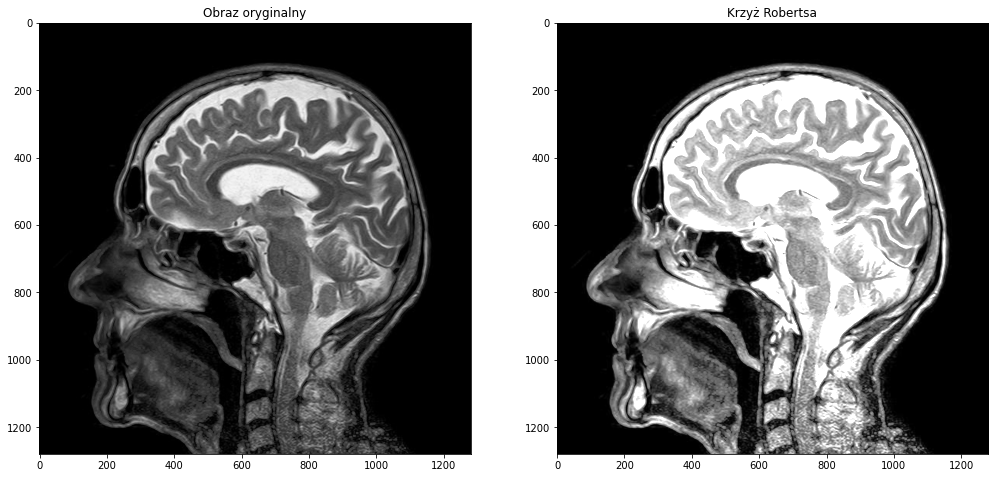

In [5]:
img_gray = img_gray.astype('float64')

roberts_cross_v = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]])

roberts_cross_h = np.array([[0, 0, 0],
                            [0, 0, 1],
                            [0,-1, 0]])

vertical = ndimage.convolve(img_gray, roberts_cross_v)
horizontal = ndimage.convolve(img_gray, roberts_cross_h)

roberts_edge = np.sqrt(np.square(horizontal) + np.square(vertical))

plt.figure(figsize=(17,12))

plt.subplot(1,2,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Krzyż Robertsa")
plt.imshow(roberts_edge, cmap='gray', vmin=0, vmax=255)


## Operator Prewitta

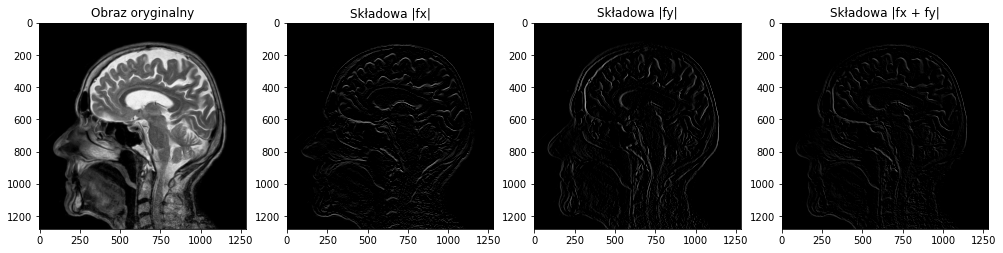

In [6]:
img_gray = cv.GaussianBlur(img_gray,(5,5),0)

kernel_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewitt_edge_x = cv.filter2D(img_gray, cv.CV_64F, kernel_x)
prewitt_edge_y = cv.filter2D(img_gray, cv.CV_64F, kernel_y)

prewitt_edge_x_y = cv.addWeighted(prewitt_edge_x, 0.5,prewitt_edge_y, 0.5, 0)

plt.figure(figsize=(17,12))

plt.subplot(1,4,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,2)
plt.title("Składowa |fx|")
plt.imshow(prewitt_edge_x, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,3)
plt.title("Składowa |fy|")
plt.imshow(prewitt_edge_y, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,4)
plt.title("Składowa |fx + fy|")
plt.imshow(prewitt_edge_x_y, cmap='gray', vmin=0, vmax=255)

## Operator Kirscha

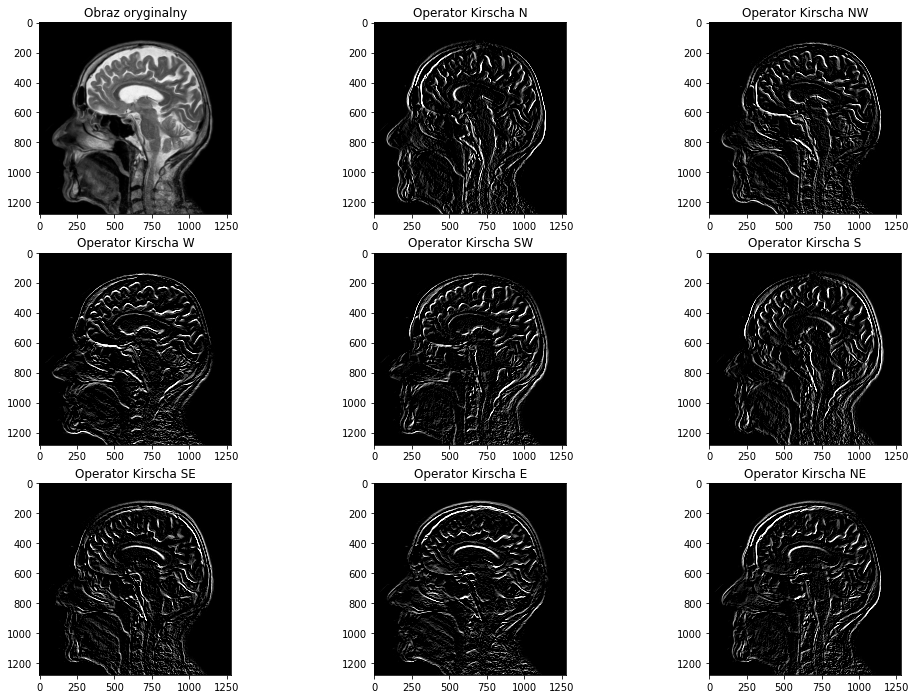

In [7]:
kirsch_N  = np.array([[-3, -3,  5], [-3,  0,  5], [-3, -3,  5]])
kirsch_NW = np.array([[-3,  5,  5], [-3,  0,  5], [-3, -3, -3]]) 
kirsch_W  = np.array([[ 5,  5,  5], [-3,  0, -3], [-3, -3, -3]]) 
kirsch_SW = np.array([[ 5,  5, -3], [ 5,  0, -3], [-3, -3, -3]]) 
kirsch_S  = np.array([[ 5, -3, -3], [ 5,  0, -3], [ 5, -3, -3]]) 
kirsch_SE = np.array([[-3, -3, -3], [ 5,  0, -3], [ 5,  5, -3]])
kirsch_E  = np.array([[-3, -3, -3], [-3,  0, -3], [ 5,  5,  5]]) 
kirsch_NE = np.array([[-3, -3, -3], [-3,  0,  5], [-3,  5,  5]]) 

kirsch_edge_N  =  cv.filter2D(img_gray, -1, kirsch_N)
kirsch_edge_NW =  cv.filter2D(img_gray, -1, kirsch_NW)
kirsch_edge_W  =  cv.filter2D(img_gray, -1, kirsch_W)
kirsch_edge_SW =  cv.filter2D(img_gray, -1, kirsch_SW)
kirsch_edge_S  =  cv.filter2D(img_gray, -1, kirsch_S)
kirsch_edge_SE =  cv.filter2D(img_gray, -1, kirsch_SE)
kirsch_edge_E  =  cv.filter2D(img_gray, -1, kirsch_E)
kirsch_edge_NE =  cv.filter2D(img_gray, -1, kirsch_NE)

plt.figure(figsize=(17,12))

plt.subplot(3,3,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,2)
plt.title("Operator Kirscha N")
plt.imshow(kirsch_edge_N, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,3)
plt.title("Operator Kirscha NW")
plt.imshow(kirsch_edge_NW, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,4)
plt.title("Operator Kirscha W")
plt.imshow(kirsch_edge_W, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,5)
plt.title("Operator Kirscha SW")
plt.imshow(kirsch_edge_SW, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,6)
plt.title("Operator Kirscha S")
plt.imshow(kirsch_edge_S, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,7)
plt.title("Operator Kirscha SE")
plt.imshow(kirsch_edge_SE, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,8)
plt.title("Operator Kirscha E")
plt.imshow(kirsch_edge_E, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,9)
plt.title("Operator Kirscha NE")
plt.imshow(kirsch_edge_NE, cmap='gray', vmin=0, vmax=255)

## Operator Sobela 

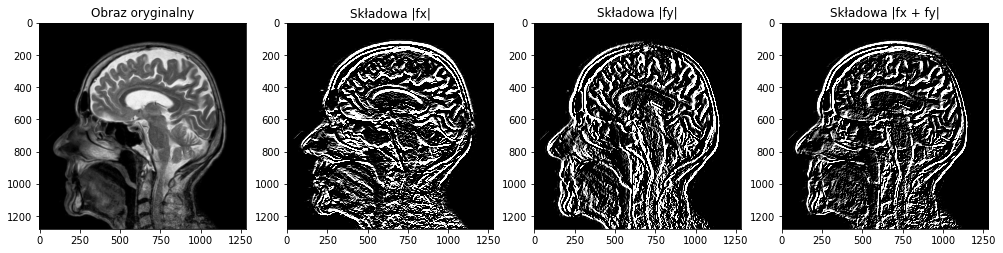

In [8]:
img_gray = cv.GaussianBlur(img_gray,(5,5),0)

sobel_egde_x = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize = 5)
sobel_edge_y = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize = 5)

sobel_edge_x_y = cv.addWeighted(sobel_egde_x, 0.5,sobel_edge_y, 0.5, 0)


plt.figure(figsize=(17,12))

plt.subplot(1,4,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,2)
plt.title("Składowa |fx|")
plt.imshow(sobel_egde_x, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,3)
plt.title("Składowa |fy|")
plt.imshow(sobel_edge_y, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,4)
plt.title("Składowa |fx + fy|")
plt.imshow(sobel_edge_x_y, cmap='gray', vmin=0, vmax=255)

## Laplasjan

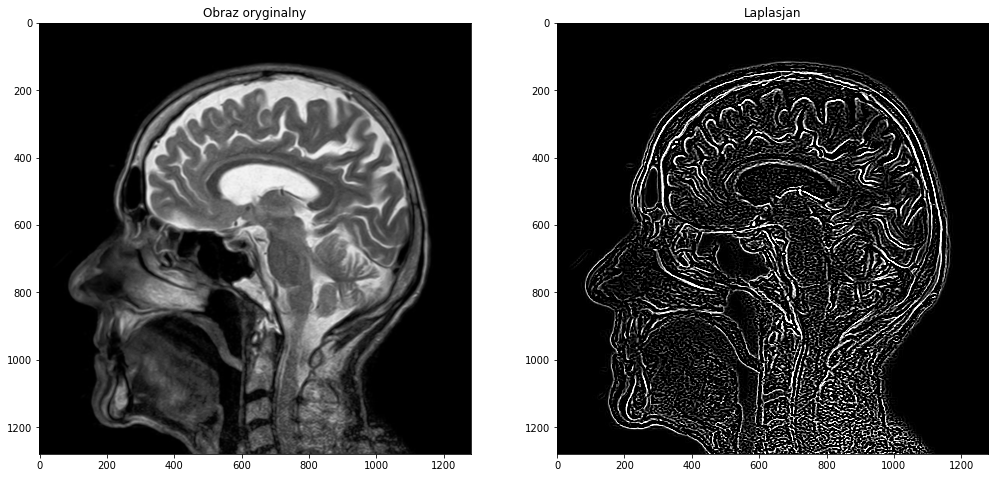

In [9]:
laplacian_edge = cv.Laplacian(img_gray, cv.CV_64F, ksize = 5)

plt.figure(figsize=(17,12))

plt.subplot(1,2,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Laplasjan")
plt.imshow(laplacian_edge, cmap='gray', vmin=0, vmax=255)

## Detektor Marra - Hildretha

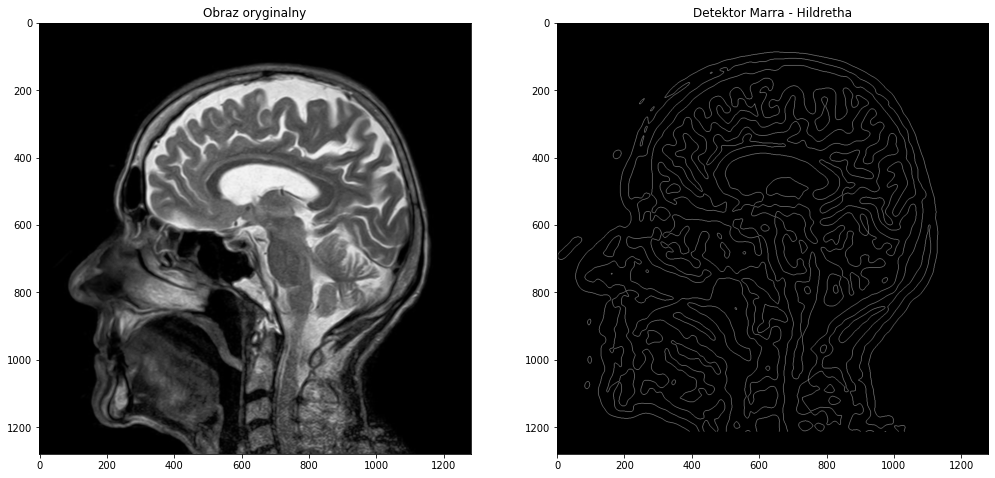

In [10]:
def edgeMarrHildreth(img, sigma):
    size = int(2*(np.ceil(3*sigma))+1)
    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))
    normal = 1 / (2.0 * np.pi *sigma**2)
    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal
    
    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)
    
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i, j] = np.sum(window)
            
    log = log.astype(np.int64, copy=False)
    zero_crossing = np.zeros_like(log)
    
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
 
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
 
                    zero_crossing[i][j] = 255
 
            if log[i][j] < 0:
 
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
 
                    zero_crossing[i][j] = 255
 
    return zero_crossing

marr_hildreth_edge = edgeMarrHildreth(img_gray, 11)
marr_hildreth_edge = marr_hildreth_edge.astype(np.uint8)

plt.figure(figsize=(17,12))

plt.subplot(1,2,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Detektor Marra - Hildretha")
plt.imshow(marr_hildreth_edge, cmap='gray', vmin=0, vmax=255)

## Detektor Canny'ego

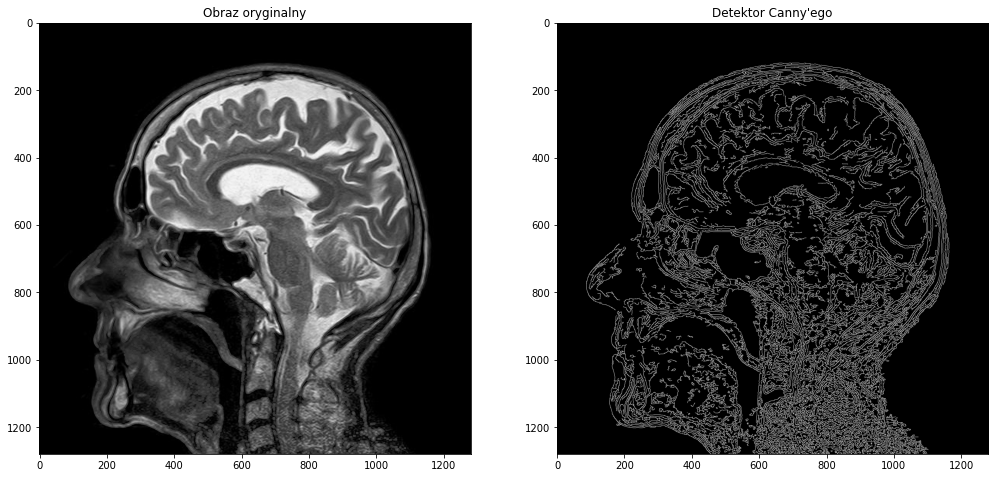

In [4]:
canny_edge = cv.Canny(img_gray, 30, 100)

plt.figure(figsize=(17,12))

plt.subplot(1,2,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Detektor Canny'ego")
plt.imshow(canny_edge, cmap='gray', vmin=0, vmax=255)